In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


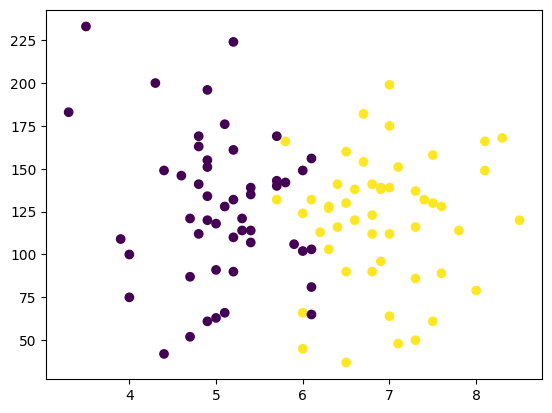

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df.cgpa,df.iq,c=df.placement);

In [6]:
x=df.iloc[:,0:2]

In [7]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [8]:
y = df.iloc[:,-1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_train

array([[ 0.6655992 ,  0.41043632],
       [ 1.30579384,  0.85173468],
       [ 1.21433746,  0.17680777],
       [ 0.39123006,  0.90365213],
       [-0.24896458,  1.0594045 ],
       [ 0.93996833,  0.67002359],
       [-0.98061561, -0.88750004],
       [-0.70624647, -0.10873822],
       [ 0.39123006,  0.12489032],
       [-1.07207199, -1.66626185],
       [ 0.93996833, -2.0037253 ],
       [-1.89517939, -1.30283967],
       [ 0.84851195,  0.35851886],
       [ 1.39725022, -0.93941749],
       [-0.6147901 , -0.29044931],
       [ 0.02540455,  0.79981722],
       [-0.6147901 ,  0.25468396],
       [-0.06605183, -0.03086204],
       [ 0.02540455, -0.57599531],
       [ 0.29977368, -0.23853186],
       [ 1.12288109,  0.30660141],
       [-0.70624647, -0.29044931],
       [ 0.48268644,  0.33256014],
       [ 2.03744487,  1.11132195],
       [ 0.11686093, -0.31640804],
       [ 0.6655992 , -0.05682077],
       [ 0.20831731, -0.57599531],
       [ 1.12288109, -1.01729367],
       [-0.88915923,

In [13]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.58016298, -0.29044931],
       [-0.88915923, -1.53646821],
       [-2.53537404,  1.50070286],
       [-1.25498474, -0.10873822],
       [ 0.57414282,  0.74789977],
       [-1.52935388, -2.15947766],
       [ 0.39123006, -2.2892713 ],
       [-1.16352836,  0.41043632],
       [-1.34644112,  0.54022995],
       [-1.25498474, -0.99133494]])

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [15]:
clf.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [17]:
y_test

55    1
9     0
17    0
24    0
74    1
96    0
82    1
51    0
39    0
23    0
Name: placement, dtype: int64

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
score = accuracy_score(y_test,y_pred)*100
score

100.0

<Axes: >

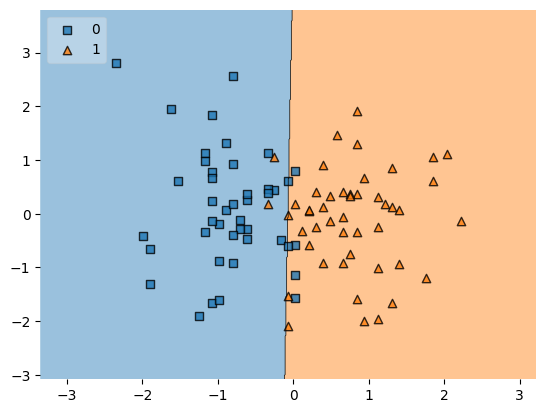

In [21]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)